In [1]:
pwd!

'/Users/yegu/Documents/Pymaceuticals/Module-5-Pymaceuticals'

# Pymaceuticals Inc.
---

### Analysis

1. Per the summary statistics, mice treated with Capomulin and Ramicane had the lowest mean, median, variance for tumor volume. The SEM is also low which means the sample means are closely distributed around the population mean, as such the sample for these two drug regimen is representative of the population. The SEM can be decreased by increasing the sample size. As per the bar chart, the highest and 2nd highest number of mice in the study are treated using Capomulin and Ramicane.
2. The amount of female (49%) and male (51%) mice used for the study are almost equal.
3. For mouse ID 1509 treated with Capolmulin, the line plot suggests that over time the tumor volume do decrease. However, the tumor volume is not steadly decreasing over time, the tumor volume increases and then decrease.  
4. The box plot demonstrates that there is no large spread of the tumor volume for Capomulin and Ramicane. Only Infubinol have an outlier. 
5. The correlation between mouse weight and the average tumor volume for Capomulin regimen is 0.84. This suggests that there is a strong postive coorelation between these two variable and final tumor volume could be predicted by using the average weight of a mouse. The linear regression further shows the relationship between weight and final tumor volume as final tumor volume(y)=0.95(weight/x)+21.55. 
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
Pymaceuticals_Combined=school_data_complete = pd.merge(study_results,mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
Pymaceuticals_Combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mice_count=len(Pymaceuticals_Combined["Mouse ID"].unique())
mice_count

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint
#looked up how to get duplicated values https://www.statology.org/pandas-find-duplicates/#:~:text=You%20can%20use%20the%20duplicated%20%28%29%20function%20to,across%20specific%20columns%20duplicateRows%20%3D%20df%20%5Bdf.duplicated%28%5B%27col1%27%2C%20%27col2%27%5D%29%5D
DuplicateMiceID=Pymaceuticals_Combined[Pymaceuticals_Combined.duplicated(['Mouse ID', 'Timepoint'])]
DuplicateMiceID["Mouse ID"].unique()

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
MiceID_g989=Pymaceuticals_Combined.loc[Pymaceuticals_Combined["Mouse ID"]=="g989"]
MiceID_g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Pymaceuticals_Cleaned=Pymaceuticals_Combined.drop(MiceID_g989.index)
Pymaceuticals_Cleaned.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
Cleaned_mouse_count=len(Pymaceuticals_Cleaned["Mouse ID"].unique())
Cleaned_mouse_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Drug_Regimen_mean=Pymaceuticals_Cleaned.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
Drug_Regimen_median=Pymaceuticals_Cleaned.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
Drug_Regimen_Var=Pymaceuticals_Cleaned.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
Drug_Regimen_std=Pymaceuticals_Cleaned.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
Drug_Regimen_sem=Pymaceuticals_Cleaned.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
Drug_Regimen_summary=pd.DataFrame({"Mean Tumor Volume":Drug_Regimen_mean,
                                  "Median Tumor Volume":Drug_Regimen_median,
                                  "Tumor Volume Variance":Drug_Regimen_Var,
                                  "Tumor Volume Std. Dev.":Drug_Regimen_std,
                                  "Tumor Volume Std. Err.": Drug_Regimen_sem})
Drug_Regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution) Pymaceuticals_Cleaned.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
Drug_reg_summary_agg=Pymaceuticals_Cleaned.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

# Using the aggregation method, produce the same summary statistics in a single line
Drug_reg_summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

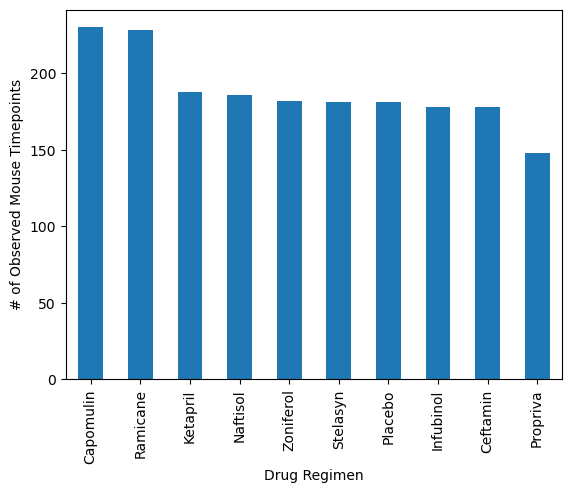

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#Get the total mouse ID/Timepoints per drug regiment
Drug_reg_data = Pymaceuticals_Cleaned["Drug Regimen"].value_counts()
#Drug_reg_data
# have already set your index using Drug_reg_data so you can just do df.plot(kind = 'bar')
Drug_reg_data.plot(kind = 'bar', xlabel="Drug Regimen",ylabel="# of Observed Mouse Timepoints")


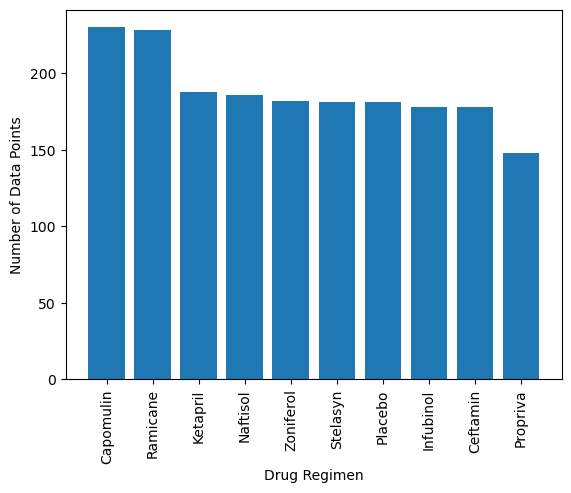

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#set x axis and ticket locations
x_axis = np.arange(len(Drug_reg_data))
tick_locations = [value for value in x_axis]

#Create a list indicating where to write x labels 
plt.bar(x_axis,Drug_reg_data)
plt.xticks(tick_locations,Drug_reg_data.index.values,rotation="vertical")

# Set labels for axes
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.show()

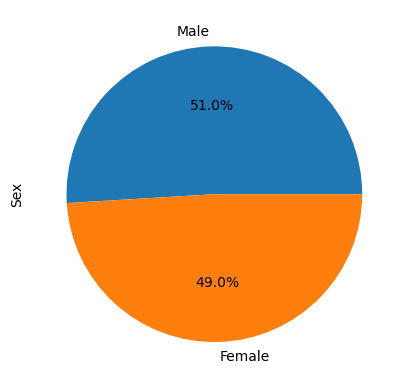

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Identify distribution of data by sex
gender_data = Pymaceuticals_Cleaned['Sex'].value_counts()
#gender_data
pie_panda=gender_data.plot(kind="pie",autopct= '%1.1f%%')

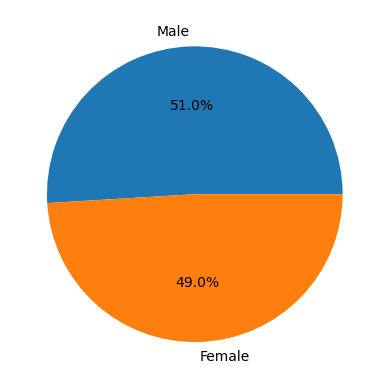

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_data,labels=gender_data.index.values,autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol = Pymaceuticals_Combined.groupby(["Drug Regimen", "Mouse ID"]).last()[["Timepoint","Tumor Volume (mm3)"]]
final_tumor= final_tumor_vol.reset_index()

final_tumor.head()

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
regimen= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in regimen:
    final_tumor_volume = final_tumor.loc[final_tumor['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    #final_tumor_volume
    
    # add subset 
    final_tumor_vol_list.append(final_tumor_volume)
    
    quartiles = final_tumor_volume.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound)| (final_tumor_volume > upper_bound)]

    # Print out the result
    print(f"{drug}'s' potential outliers: {outliers}")
    
    

Capomulin's' potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's' potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's' potential outliers: 55    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's' potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


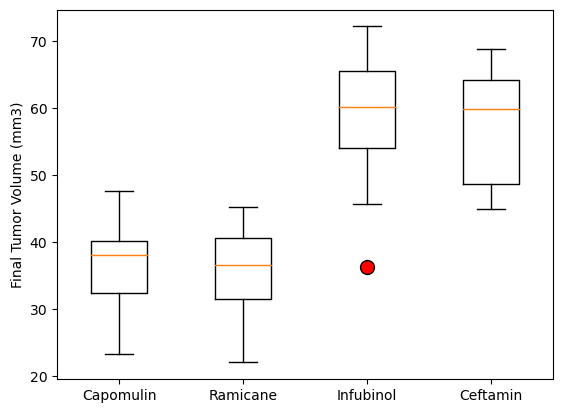

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, final_tumor_plot = plt.subplots()
final_tumor_plot.boxplot(final_tumor_vol_list, labels=regimen,flierprops={'markerfacecolor':'r','markersize': 10})

# Set y label
final_tumor_plot.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

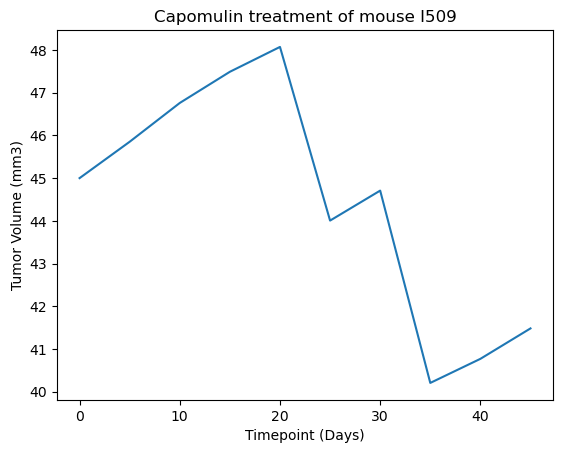

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Single_mouse_Capomulin= Pymaceuticals_Cleaned.loc[(Pymaceuticals_Cleaned['Drug Regimen'] == 'Capomulin') & (Pymaceuticals_Cleaned['Mouse ID']== "l509")]
#Single_mouse_Capomulin
tumorvstimepoint = plt.plot(Single_mouse_Capomulin['Timepoint'], Single_mouse_Capomulin['Tumor Volume (mm3)'])
plt.title(f"Capomulin treatment of mouse I509")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

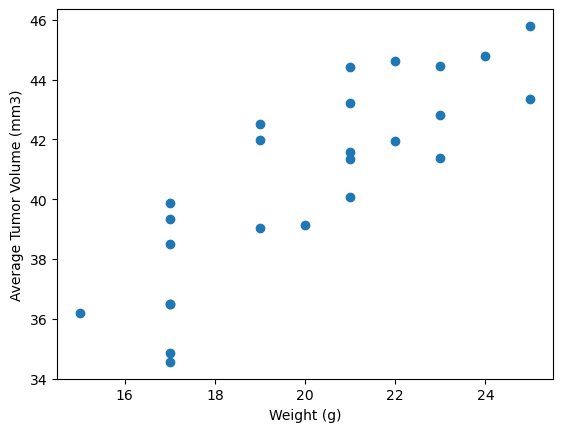

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_data=Pymaceuticals_Cleaned.loc[Pymaceuticals_Cleaned['Drug Regimen'] == 'Capomulin']
#Capomulin_data
average_tumor=Capomulin_data.groupby(["Mouse ID"])['Tumor Volume (mm3)'].mean()
mice_weight=Capomulin_data.groupby(["Mouse ID"])['Weight (g)'].mean()
plt.scatter(mice_weight, average_tumor)

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


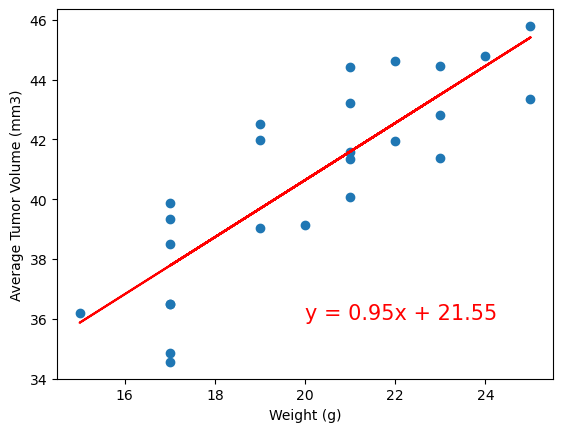

In [21]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#Calculate the correlation coefficient, used the class activity: correlations_solution
print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(mice_weight, average_tumor)[0],2)}")

#a linear regression model, repeat the scatter plot, used class example regression
x_values=mice_weight
y_values=average_tumor

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,36),fontsize=15, color="red")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()